In [31]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install comtradeapicall

In [32]:
# Install a pip pandas package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [33]:
# Install a pip matplotlib package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

In [34]:
# Install a pip scipy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scipy

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

In [36]:
subscription_key = '<YOUR KEY>' # comtrade api subscription key (from comtradedeveloper.un.org)
directory = '<OUTPUT DIR>'  # output directory for downloaded files

In [38]:
# Call get tariffline data API to a data frame, max to 250K records, free/premium subscription key required
# This example: imports of the assigned commodity_code (below) so that we can calculate the global unit value ($/kg)

In [39]:
Commodity_code = '3006' #pharmaceutical goods
Commodity_code = '1006' #rice
Commodity_code = '6309' #secondhand/ worn clothing
Commodity_code = '7108' #non-monetary gold
Commodity_code = '0901' #coffee
Commodity_code = '9201' #piano
Commodity_code = '2709' #crude oil


In [40]:
#get tariffline import data for assigned commodity_code for two years. 
#Tips: query may time out if too many periods are selected, and it's better to split the queries
#    : if description is not required, set includeDesc=False
df2020 = comtradeapicall.getTarifflineData(subscription_key, typeCode='C', freqCode='M', clCode='HS', 
                                         period='202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012', 
                                         reporterCode=None, cmdCode=Commodity_code, flowCode='M', 
                                         partnerCode=None, partner2Code=None, customsCode=None, motCode=None, maxRecords=None, 
                                         format_output='JSON',
                                         countOnly=None, includeDesc=True)

In [41]:
#get tariffline import data for assigned commodity_code for two years. 
#Tips: query may time out if too many periods are selected, and it's better to split the queries
#    : if description is not required, set includeDesc=False
df2021 = comtradeapicall.getTarifflineData(subscription_key, typeCode='C', freqCode='M', clCode='HS', 
                                         period='202101,202102,202103,202104,202105,202106,202107,202108,202109,202110,202111,202112', 
                                         reporterCode=None, cmdCode=Commodity_code, flowCode='M', 
                                         partnerCode=None, partner2Code=None, customsCode=None, motCode=None, maxRecords=None, 
                                         format_output='JSON',
                                         countOnly=None, includeDesc=True)

In [42]:
#get tariffline import data for assigned commodity_code for two years. 
#Tips: query may time out if too many periods are selected, and it's better to split the queries
#    : if description is not required, set includeDesc=False
df2022 = comtradeapicall.getTarifflineData(subscription_key, typeCode='C', freqCode='M', clCode='HS', 
                                         period='202201,202202,202203,202204,202205,202206,202207,202208,202209,202210,202211,202212', 
                                         reporterCode=None, cmdCode=Commodity_code, flowCode='M', 
                                         partnerCode=None, partner2Code=None, customsCode=None, motCode=None, maxRecords=None, 
                                         format_output='JSON',
                                         countOnly=None, includeDesc=True)

In [44]:
#combine the all data frames
panDForig = pd.concat([df2020, df2021, df2022])

In [45]:
#convert period to string for better viz
panDForig['period'] = panDForig['period'].astype('string')
panDForig['motCode'] = panDForig['motCode'].astype('string')
print(panDForig.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15899 entries, 0 to 5289
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   typeCode            15899 non-null  object 
 1   freqCode            15899 non-null  object 
 2   refPeriodId         15899 non-null  int64  
 3   period              15899 non-null  string 
 4   reporterCode        15899 non-null  int64  
 5   reporterDesc        15899 non-null  object 
 6   reporterISO         15899 non-null  object 
 7   flowCode            15899 non-null  object 
 8   flowDesc            15899 non-null  object 
 9   partnerCode         15899 non-null  int64  
 10  partnerDesc         15899 non-null  object 
 11  partnerISO          15899 non-null  object 
 12  partner2Code        15899 non-null  int64  
 13  partner2Desc        15899 non-null  object 
 14  partner2ISO         15899 non-null  object 
 15  classificationCode  15899 non-null  object 
 16  cmdCo

In [46]:
 #show some records
panDForig.head()

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20200101,202001,100,Bulgaria,BGR,M,Import,818,...,kg,74772300.0,8,kg,74772300.0,74772300.0,0.0,3.476597e+07,0.0,3.476597e+07
1,C,M,20200101,202001,100,Bulgaria,BGR,M,Import,818,...,kg,82265100.0,8,kg,82265100.0,82265100.0,0.0,3.712148e+07,0.0,3.712148e+07
2,C,M,20200101,202001,100,Bulgaria,BGR,M,Import,643,...,kg,320205000.0,8,kg,320205000.0,320205000.0,0.0,1.411825e+08,0.0,1.411825e+08
3,C,M,20200101,202001,100,Bulgaria,BGR,M,Import,300,...,kg,79974300.0,8,kg,79974300.0,79974300.0,0.0,3.491205e+07,0.0,3.491205e+07
4,C,M,20200101,202001,100,Bulgaria,BGR,M,Import,300,...,kg,28692200.0,8,kg,28692200.0,28692200.0,0.0,1.270539e+07,0.0,1.270539e+07


In [47]:
#some descriptive stats
panDForig[['primaryValue','netWgt']].describe()

,primaryValue,netWgt
count,1.589900e+04,1.589900e+04
mean,1.325483e+08,2.683380e+08
std,3.903629e+08,8.722885e+08
min,0.000000e+00,0.000000e+00
25%,4.135073e+02,2.000000e+01
50%,2.486172e+07,4.072100e+07
75%,9.119007e+07,1.598010e+08
max,6.875790e+09,1.665414e+10


In [48]:
#add new column UVnetWgt = primaryValue/netWgt
panDForig['UVnetWgt'] = panDForig.primaryValue / panDForig.netWgt

In [49]:
#remove UVnetWgt NaN,zero, inf, but and keeping only mode of transport and period
panDF = panDForig[["motDesc","period","UVnetWgt"]]
panDF = panDF[panDF.notnull()].query('UVnetWgt>0')
panDF = panDF[panDF.notnull()].query('UVnetWgt<999999999999999')
panDF.describe()

,UVnetWgt
count,1.294700e+04
mean,2.631920e+04
std,5.229876e+05
min,2.774619e-04
25%,3.862882e-01
50%,5.167620e-01
75%,6.957305e-01
max,2.690536e+07


Text(0.5, 1.0, 'Unit Value Distribution')

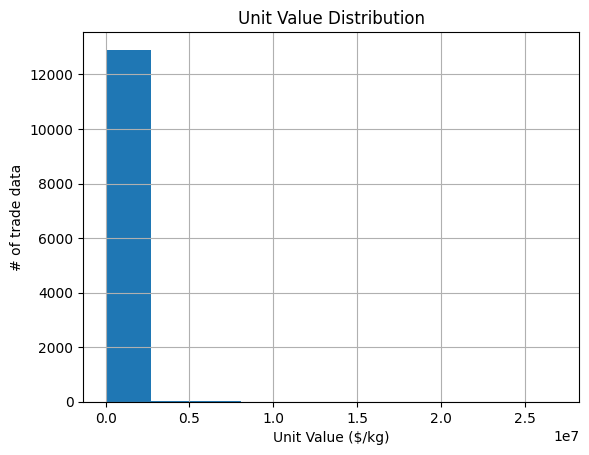

In [50]:
 # plot the Unit Value histogram
panDF.hist("UVnetWgt");
plt.xlabel('Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

Text(0.5, 1.0, 'Unit Value Distribution')

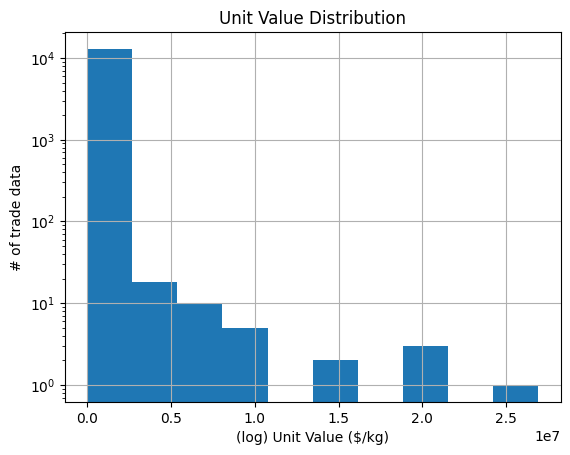

In [51]:
# plot the Unit Value histogram - in log scale (more suited for trade data with long distribution tail)
panDF.hist("UVnetWgt", log=True);
plt.xlabel('(log) Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

In [52]:
#add log UVnetWgtLog
panDF.loc[:,'UVnetWgtLog'] = np.log(panDF['UVnetWgt'])
panDF.describe()

,UVnetWgt,UVnetWgtLog
count,1.294700e+04,12947.000000
mean,2.631920e+04,-0.240648
std,5.229876e+05,1.884781
min,2.774619e-04,-8.189827
25%,3.862882e-01,-0.951171
50%,5.167620e-01,-0.660173
75%,6.957305e-01,-0.362793
max,2.690536e+07,17.107836


In [53]:
#remove outliers based on zcores (if more than 3 standard deviation) on the log Unit Value
from scipy.stats import zscore
#calculate z-scores of `df`
z_scores = zscore(panDF['UVnetWgtLog'], axis=0)
#print(z_scores)
abs_z_scores = np.abs(z_scores)
#print(abs_z_scores)
filtered_entries = (abs_z_scores < 3)
#print(filtered_entries)
new_panDF = panDF[filtered_entries]

In [54]:
 #descriptive statistics after outliers removal
new_panDF.describe()

,UVnetWgt,UVnetWgtLog
count,12600.000000,12600.000000
mean,3.100962,-0.475031
std,15.544524,1.094790
min,0.010542,-4.552378
25%,0.383783,-0.957677
50%,0.509929,-0.673484
75%,0.673745,-0.394904
max,224.000000,5.411646


array([[<AxesSubplot:title={'center':'UVnetWgt'}>,
        <AxesSubplot:title={'center':'UVnetWgtLog'}>]], dtype=object)

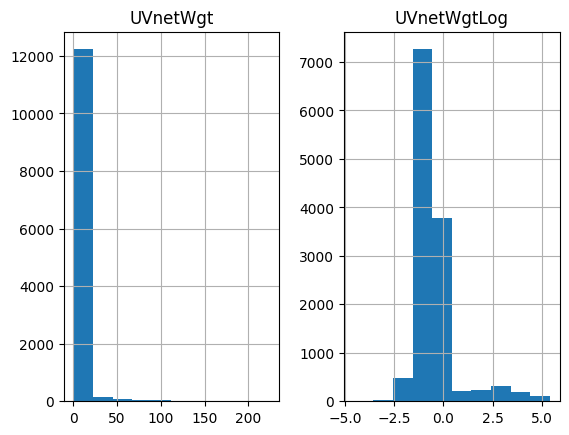

In [55]:
#histogram statistics after outliers removal
new_panDF.hist(column=['UVnetWgt','UVnetWgtLog'])

<AxesSubplot:xlabel='period'>

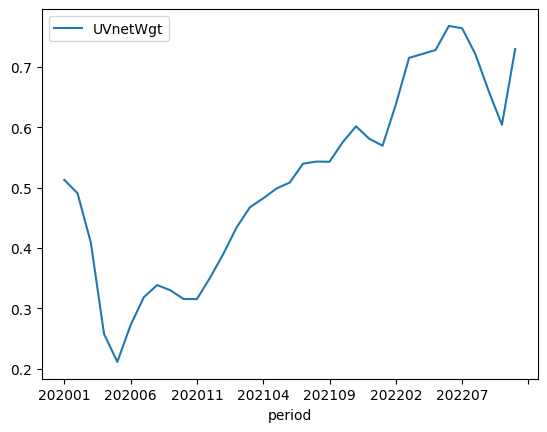

In [56]:
#plot median in timeseries after outliers removal
new_panDF[['period','UVnetWgt']].groupby("period").median().plot()

<AxesSubplot:xlabel='motDesc'>

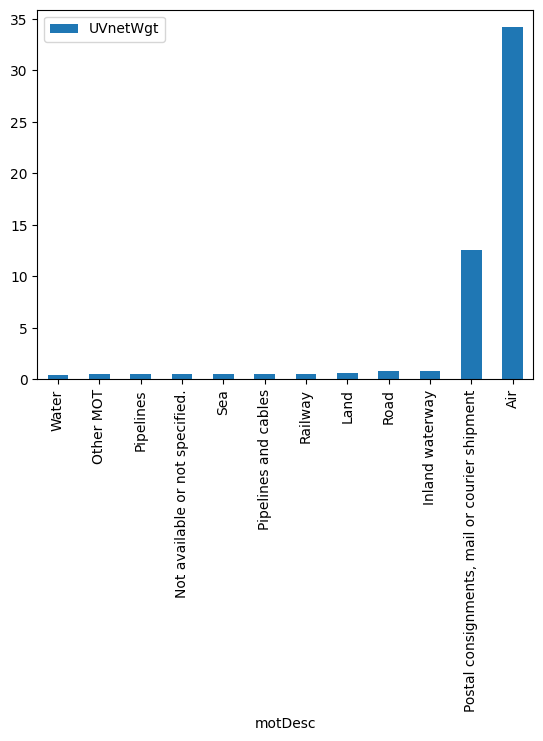

In [57]:
#plot median by mode of transport after outliers removal
new_panDF[['motDesc','UVnetWgt']].groupby("motDesc").median().sort_values(by='UVnetWgt').plot.bar(y='UVnetWgt', rot=90)

In [58]:
#some extra analysis  - descriptive statstiscs by period
new_panDF[['period','UVnetWgt']].groupby("period").describe()

UVnetWgt                                                               \
          count      mean        std       min       25%       50%       75%   
period                                                                         
202001    323.0  4.324857  20.301889  0.018307  0.471344  0.512941  0.573536   
202002    312.0  2.682951   9.499394  0.017425  0.434292  0.490707  0.551041   
202003    329.0  1.461462   6.604751  0.018000  0.312534  0.409139  0.480116   
202004    349.0  3.538372  21.178414  0.016943  0.184596  0.257459  0.396716   
202005    327.0  5.360737  27.008263  0.031898  0.166951  0.211071  0.324216   
202006    339.0  3.661777  19.150411  0.017475  0.215914  0.272008  0.328127   
202007    341.0  2.219491   9.019117  0.041354  0.271522  0.318347  0.375686   
202008    362.0  1.969533  12.829694  0.043741  0.310751  0.338477  0.371543   
202009    334.0  1.820399   6.822763  0.044223  0.303336  0.329817  0.359222   
202010    357.0  2.683445  15.370991  0.058105  0.287571  0.315392  0.348460   
202011    366.0  2.794412  14.303565  0.108445  0.291224  0.315230  0.380451   
202012    360.0  2.118526  11.162586  0.113045  0.320568  0.350896  0.405150   
202101    367.0  1.524990   6.036728  0.092212  0.360980  0.390353  0.430358   
202102    356.0  3.017771  14.476186  0.103320  0.399386  0.434284  0.479210   
202103    381.0  2.549363  11.110164  0.053649  0.432510  0.467490  0.508138   
202104    391.0  3.164847  13.434022  0.100732  0.446441  0.482248  0.520434   
202105    341.0  2.122322   9.101624  0.101905  0.465388  0.498525  0.524597   
202106    362.0  2.946534  16.661634  0.047540  0.473882  0.508434  0.542031   
202107    381.0  2.964873  12.479661  0.147678  0.496804  0.539671  0.578455   
202108    396.0  3.427952  17.848526  0.010542  0.492733  0.543204  0.585096   
202109    386.0  3.888331  16.926707  0.074696  0.497869  0.542925  0.579748   
202110    351.0  4.204072  15.453404  0.172063  0.531460  0.575476  0.630201   
202111    364.0  5.050282  22.040287  0.186892  0.546131  0.601608  0.658715   
202112    374.0  4.306007  20.750175  0.022608  0.529458  0.581002  0.628948   
202201    476.0  2.156652  10.574603  0.212292  0.474511  0.569580  0.644060   
202202    452.0  3.391072  14.882469  0.170214  0.541918  0.637845  0.736838   
202203    493.0  2.554287  11.171248  0.011019  0.583543  0.715157  0.820185   
202204    400.0  4.015152  20.115252  0.221409  0.598046  0.721548  0.828189   
202205    401.0  4.036212  18.082454  0.221424  0.636063  0.728246  0.843470   
202206    396.0  4.009101  21.551805  0.117398  0.660818  0.768098  0.895099   
202207    348.0  3.544247  16.377929  0.195353  0.646304  0.764216  0.881744   
202208    413.0  4.205239  18.708901  0.127543  0.570228  0.721321  0.838526   
202209    360.0  1.973588  10.764296  0.178268  0.527879  0.660199  0.763531   
202210    302.0  1.254727   5.916418  0.184009  0.464522  0.604130  0.711236   
202211     10.0  7.101655  20.202941  0.618620  0.682589  0.729800  0.754801   

                    
               max  
period              
202001  212.895361  
202002   86.000000  
202003   92.900000  
202004  223.284466  
202005  204.407945  
202006  221.468564  
202007   97.000000  
202008  223.953333  
202009   57.060000  
202010  175.000000  
202011  203.607143  
202012  148.500000  
202101   64.000000  
202102  180.000000  
202103  141.579339  
202104  164.000000  
202105  119.697891  
202106  211.000000  
202107  117.036018  
202108  195.412212  
202109  204.424561  
202110  117.546195  
202111  200.507407  
202112  223.882718  
202201  125.286168  
202202  177.560976  
202203  162.258482  
202204  194.666667  
202205  189.500000  
202206  224.000000  
202207  196.000000  
202208  207.487051  
202209  171.268927  
202210   74.000000  
202211   64.600000

In [59]:
#some extra analysis - descriptive statstiscs by motOfTransport (air, water,land)
new_panDF[['motDesc','UVnetWgt']].groupby("motDesc").describe()

UVnetWgt                        \
                                                 count       mean        std   
motDesc                                                                        
Air                                              110.0  52.619173  53.829619   
Inland waterway                                    3.0   0.670608   0.310715   
Land                                              39.0   7.946661  12.813839   
Not available or not specified.                 8178.0   2.626681  14.551595   
Other MOT                                        143.0   1.044586   2.242311   
Pipelines                                         18.0   0.495638   0.213111   
Pipelines and cables                             846.0   0.533401   0.195791   
Postal consignments, mail or courier shipment     70.0  13.810714   7.526299   
Railway                                           35.0   0.584963   0.218477   
Road                                             614.0  13.801127  31.570645   
Sea                                             2334.0   0.571291   0.753718   
Water                                            210.0   0.414409   0.158408   

                                                                               \
                                                    min        25%        50%   
motDesc                                                                         
Air                                            0.125000  13.507457  34.183603   
Inland waterway                                0.311825   0.580913   0.850000   
Land                                           0.179896   0.454822   0.593776   
Not available or not specified.                0.010542   0.386169   0.500014   
Other MOT                                      0.029680   0.334252   0.484969   
Pipelines                                      0.117279   0.354309   0.499024   
Pipelines and cables                           0.095755   0.381241   0.527145   
Postal consignments, mail or courier shipment  0.342657  11.564612  12.607598   
Railway                                        0.240194   0.428756   0.551909   
Road                                           0.016943   0.531270   0.820184   
Sea                                            0.041432   0.355423   0.502356   
Water                                          0.041296   0.313223   0.430038   

                                                                      
                                                     75%         max  
motDesc                                                               
Air                                            77.425926  204.424561  
Inland waterway                                 0.850000    0.850000  
Land                                           14.207490   30.404231  
Not available or not specified.                 0.644075  223.882718  
Other MOT                                       0.660933   17.529451  
Pipelines                                       0.581070    0.890580  
Pipelines and cables                            0.645404    1.020169  
Postal consignments, mail or courier shipment  14.010240   57.388462  
Railway                                         0.767626    1.007398  
Road                                           11.638889  224.000000  
Sea                                             0.645020   16.645084  
Water                                           0.539424    0.731860